# Scrape Data from Shopee with beautifulsoup and selenium
### Data เพื่อการทำ Marketing ของผู้ขาย ซึ่งประกอบไปด้วย
- ชื่อสินค้าสินค้า ราคาสินค้าที่ขายจริง ยอดขายแต่ละสินค้า และจังหวัดที่เป็นต้นทางของสินค้า
- ไฟล์นี้เป็นการเขียนเองนะครับผม หากผิดพลาดประการใดแจ้งได้เลยครับ
# Ref from
- K.ปวิตร

In [12]:
# !pip install selenium
# !pip install bs4

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\DeRoxy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\DeRoxy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Code ที่ต้อง Import

In [13]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.keys import Keys
import bs4
import time
import re

Gecko Driver: https://github.com/mozilla/geckodriver/releases

# Selenium เพื่อการเข้า Web

In [37]:
#Open browser ด้วย Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Chrome()
driver.get('https://shopee.co.th/')

In [38]:
#เลือกภาษาไทย Selenium
thai_button = driver.find_element('xpath','/html/body/div[2]/div[1]/div[1]/div/div[3]/div[1]/button')
thai_button.click()
#time.sleep(3)

In [39]:
#ปิดโฆษณา Selenium
close_adver = driver.execute_script('return document.querySelector("shopee-banner-popup-stateful").shadowRoot.querySelector("div.shopee-popup__close-btn")')
close_adver.click()

In [40]:
#Search ใน Search bar ของ Shopee
search = driver.find_element('xpath','//*[@id="main"]/div/header/div[2]/div/div[1]/form/div/div[1]/input')
search.send_keys('computer')

In [41]:
#กด Enter
search.send_keys(Keys.ENTER)

In [42]:
#login
username = 'aungbikecustom'
password = 'ABiker.2022'
# Locate the username input field and enter the username
username_field = driver.find_element("name", "loginKey")
username_field.clear()  # Clear any existing text in the field
username_field.send_keys(username)
time.sleep(0.5)

# Locate the password input field and enter the password
password_field = driver.find_element("name", "password")
password_field.clear()  # Clear any existing text in the field
password_field.send_keys(password)
time.sleep(0.5)

password_field.send_keys(Keys.ENTER)


In [50]:
#Zoom out เพื่อให้ load ทั่วหน้าจอ
driver.execute_script("document.body.style.transform='scale(0.1)';")
driver.execute_script('document.body.style.transformOrigin = "0 0";')

# Scraping Process

In [57]:
data = driver.page_source #ดึงข้อมูลจากหน้าเว็บ
soup = bs4.BeautifulSoup(data) #จัดในรูปแบบ BeautifulSoup

<html dir="ltr" lang="th"><head><script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-L4QXS6R7YG&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/905703166183408?v=2.9.134&amp;r=stable&amp;domain=shopee.co.th"></script><script async="" src="//connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-WJZQSJF"></script><script type="text/shopee-short-url-checked">0</script>
<meta charset="utf-8"/>
<meta content="width=1240,shrink-to-fit=no" name="viewport"/>
<meta content="763f8de8889d9e9bd9d3fd25996cdd1bb8a0c353" name="shopee:git-sha"/>
<meta content="pc-v5.59.1" name="shopee:version"/>
<link href="/pcmall-assets/assets/icon_favicon_1
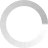
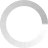
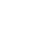

In [61]:
soup

In [75]:
elements = "#main > div > div.x\+koCD > div > div > div.sdzgsX > section.shopee-search-item-result > ul > li"
soup.select(elements) #css selector

[<li class="col-xs-2-4 shopee-search-item-result__item" data-sqe="item"><a data-sqe="link" href="/พร้อมส่ง!!-คอมประกอบเล่นเกมสเปคสุดคุ้ม-CPU-I7-i5-i3-RAM8-SSD256-RX-570-8G-จอ-20-27-สินค้าใหม่มือ1-i.119579182.13885727108?sp_atk=da8d9276-d45f-489c-84f2-18c792a0c3f6&amp;xptdk=da8d9276-d45f-489c-84f2-18c792a0c3f6"><div class="tWpFe2"><div class="VTjd7p whIxGK"><div style="pointer-events: none;"><div class="_7YC893 KUUypF"><img alt="พร้อมส่ง!! คอมประกอบเล่นเกมสเปคสุดคุ้ม CPU I7-i5-i3 RAM8 SSD256 RX 570 8G จอ 20-27 สินค้าใหม่มือ1" class="_7DTxhh tWoeMk" height="invalid-value" src="https://down-th.img.susercontent.com/file/07e961cb8e33918e525e5cdd37efad0b_tn" style="object-fit: contain" width="invalid-value"/><div class="F7xq8U"><div aria-hidden="true"><svg class="shopee-svg-icon W1KwtX icon-video-play2" enable-background="new 0 0 20 20" viewbox="0 0 20 20"><path clip-rule="evenodd" d="m10 20c5.5228 0 10-4.4772 10-10 0-5.5228-4.4772-10-10-10-5.5228 0-10 4.4772-10 10 0 5.5228 4.4772 10 10 10z"

In [97]:
el=soup.select(elements)
len(el)

60

In [102]:
e = el[0] #แทนกล่องของสินค้าแต่ละกล่อง

# Scrape ชื่อ

In [100]:
#ดึงข้อมูลชื่อ
for i in range(len(el)):
    e = el[i]
    product_name = e.select_one(f"#main > div > div.x\+koCD > div > div > div.sdzgsX > section.shopee-search-item-result > ul > li:nth-child({i+1}) > a > div > div > div.KMyn8J > div.dpiR4u > div.FDn--\+ > div").text.strip()
    print(product_name)

พร้อมส่ง!! คอมประกอบเล่นเกมสเปคสุดคุ้ม CPU I7-i5-i3 RAM8 SSD256 RX 570 8G จอ 20-27 สินค้าใหม่มือ1
🔥💥ลดวันเดียว⚡💥 คอมพิวเตอร์ DELL Core™ i5-2400 3.1 GHz RAM 4 GB HDD 500GB DVD  PC Desktop แรม 4 G เร็วแรง คอมมือสอง
โน๊ตบุ๊ค Lenovo ThinkPad L540 Core i5-GEN 4 / RAM 8GB / SSD 128GB / สเปคแรง สภาพดี!! มีประกัน by AllDeeCOM
ฟรีกล้องเว็ปแคม คอมพิวเตอร์ All in One computer Intel Core i5 ออล-อิน -วัน PC คอมพิวเตอร์ คอมพิวเตอร์ตั้งโต๊ะ เ 4G 128G
[COMZING] คอมพิวเตอร์เล่นเกมส์ ตัดต่อ ทำงาน CORE i5-2400 | RAM 8GB | การ์ดจอแยก 2G | SSD 120GB คอมประกอบ เล่นเกม GTA V Frefire FIFA4 พร้อมใช้งาน
**จัดส่งฟรี**ใช้สำนักงาน-เล่นเกมส์ลื่นๆ Core i7,i5,i3 DELL,HP,Lenovo คอมพิวเตอร์มือสอง ครบชุดพร้อมใช้งาน จอ17,19
[COMZING]🔥🔥HOT🔥 คอมพิวเตอร์เล่นเกมส์ คอมทำงาน เล่นเกมเบาๆ พร้อมจอ 19นิ้ว ราคาประหยัด พร้อมใช้งาน (ครบชุด)
คอมพิวเตอร์ครบชุดพร้อมใช้งานรับWiFiได้
**จัดส่งฟรี**CPU-i7ใส่การ์ดจอได้เน้นเกม Dell Corei7-4770(Gen4) RamDDR3 4-16GB คอมพิวเตอร์มือสองPCและครบชุด
คอมพิวเตอร์ Dell ใช้งานดี ราคาถูกมาก Core i3 2100 

# Scrape ราคา

In [104]:
#ราคา A baht - B baht, ราคาเต็ม
e.select_one("#main > div > div.x\+koCD > div > div > div.sdzgsX > section.shopee-search-item-result > ul > li:nth-child(1) > a > div > div > div.KMyn8J > div.hpDKMN > div").text.strip()

'฿9,900 - ฿16,500'

In [108]:
#ราคาลดแล้ว
p = e.select_one("#main > div > div.x\+koCD > div > div > div.sdzgsX > section.shopee-search-item-result > ul > li:nth-child(11) > a > div > div > div.KMyn8J > div.hpDKMN > div.vioxXd.rVLWG6").text.strip()
if p == '':
    print(1/0)
p

AttributeError: 'NoneType' object has no attribute 'text'

In [109]:
#ราคารวมการตัด
try:
    p = e.select_one("div.col-xs-2-4 > a > div > div > div:nth-child(2) > div:nth-child(2)> div:nth-child(2)").text.strip()
    if p == '':
        print(1/0)
except:
    p = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1)").text.strip()
p = p.replace(",", "").replace("฿", "").replace(" ", "")
p

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
#ตัด - และเลือกเลขด้านหน้า Range
try:
    start_price = float(p)
except:
    price = p.rpartition('-')[0]
    start_price = float(price)

start_price

In [ ]:
#รวม
try:
    p = e.select_one("div.col-xs-2-4 > a > div > div > div:nth-child(2) > div:nth-child(2)> div:nth-child(2)").text.strip()
except:
    p = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1)").text.strip()
p = p.replace(",", "").replace("฿", "").replace(" ", "")
try:
    start_price = float(p)
except:
    price = p.rpartition('-')[0]
    start_price = float(price)

start_price

# Scrape ยอดขาย

In [ ]:
sales = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(3) > div:nth-child(3)").text.strip().replace("พัน","000").replace("ล้าน","000000")
try:
    sales = float(re.sub('\D','',sales))
except:
    sales = 0
sales

# Scrape จังหวัด

In [ ]:
#จังหวัด
e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(4)").text.strip()

# Scrape ข้อมูลทั้งหมดที่ต้องการ

ทำเป็น list ของในหน้านั้น ๆ ที่กำลังดูอยู่ใน Web Shopee
นำ Code ต่าง ๆ มารวมกัน

In [ ]:
records=[]
data = driver.page_source
soup = bs4.BeautifulSoup(data)
el=soup.select(".row>div")
for e in el:
    name = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(1)").text.strip()
    try:
        p = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(2)").text.strip()
        if p == '':
            print(1/0)
    except:
        p = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1)").text.strip()
    p = p.replace(",", "").replace("฿", "").replace(" ", "")
    try:
        start_price = float(p)
    except:
        price = p.rpartition('-')[0]
        start_price = float(price)

    sales = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(3) > div:nth-child(3)").text.strip().replace("พัน","000").replace("ล้าน","000000")
    try:
        sales = float(re.sub('\D','',sales))
    except:
        sales = 0
    province = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(4)").text.strip()
    #print(name, p)
    records.append([name, start_price,sales,province])

records

In [ ]:
len(records)

In [ ]:
#ใช้ Selenium ในการกดปุ่มเพื่อไปหน้าถัดไป
next_button = driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div/div/div[2]/div[2]/div[3]/div/button[8]')
next_button.click()

In [ ]:
# การ Scrape ข้อมูลจากหลายหน้าของ Web Shopee
records=[]
for i in range(3):
    data = driver.page_source
    soup = bs4.BeautifulSoup(data)
    el=soup.select(".row>div")
    for e in el:
        name = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(1)").text.strip()
        try:
            p = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(2)").text.strip()
            if p == '':
                print(1/0)
        except:
            p = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1)").text.strip()
        p = p.replace(",", "").replace("฿", "").replace(" ", "")
        try:
            start_price = float(p)
        except:
            price = p.rpartition('-')[0]
            start_price = float(price)

        sales = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(3) > div:nth-child(3)").text.strip().replace("พัน","000").replace("ล้าน","000000")
        try:
            sales = float(re.sub('\D','',sales))
        except:
            sales = 0
        province = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(4)").text.strip()
        #print(name, p)
        records.append([name, start_price,sales,province])


    time.sleep(5)
    next_button = driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div/div/div[2]/div[2]/div[3]/div/button[8]')
    next_button.click()
    time.sleep(5)


In [ ]:
#ทำเป็น DataFrame
df = pd.DataFrame(records, columns=['itemname','price','qty','province']) # ใส้ชื่อ Columns ทั้งหมด
df

# สูตรที่สามารถนำไปใช้ได้

In [ ]:
# ตั้งแต่เริ่มจนจบ
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe' #เปลี่ยนตาม Location ของไฟล์ Firefox ของท่านเอง
driver = webdriver.Firefox(executable_path=r'C:\Users\COMPUTER\Desktop\Shopee_Web_Scraping\geckodriver.exe', options=options) #เปลี่ยนตาม Location Gecko Driver ของท่านเอง
driver.get('https://shopee.co.th/')
time.sleep(5)
thai_button = driver.find_element_by_xpath('/html/body/div[2]/div[1]/div[1]/div/div[3]/div[1]/button')
thai_button.click()
time.sleep(3)
close_adver = driver.execute_script('return document.querySelector("shopee-banner-popup-stateful").shadowRoot.querySelector("div.shopee-popup__close-btn")')
close_adver.click()
time.sleep(3)
search = driver.find_element_by_xpath('/html/body/div[1]/div/div[2]/div[1]/div[2]/div/div[1]/div[1]/div/form/input')
search.send_keys('dog') #ใส่เนื้อหาที่ต้องการที่จะ Scrape จากเว็บ Shopee
search.send_keys(Keys.ENTER)

driver.execute_script("document.body.style.MozTransform='scale(0.1)';")
driver.execute_script('document.body.style.MozTransformOrigin = "0 0";')

time.sleep(5)
records=[]
for i in range(3): #ใส่จำนวนหน้าที่ต้องการ Scrape ในวงเล็บ
    data = driver.page_source
    soup = bs4.BeautifulSoup(data)
    el=soup.select(".row>div")
    for e in el: #เพิ่มเนื้อหาต่าง ๆ ที่จะ Scrape ใน Loop นี้
        name = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(1)").text.strip()
        try:
            p = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(2)").text.strip()
            if p == '':
                print(1/0)
        except:
            p = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1)").text.strip()
        p = p.replace(",", "").replace("฿", "").replace(" ", "")
        try:
            start_price = float(p)
        except:
            price = p.rpartition('-')[0]
            start_price = float(price)

        sales = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(3) > div:nth-child(3)").text.strip().replace("พัน","000").replace("ล้าน","000000")
        try:
            sales = float(re.sub('\D','',sales))
        except:
            sales = 0
        province = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(4)").text.strip()
        #print(name, p)
        records.append([name, start_price,sales,province])


    time.sleep(5)
    next_button = driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div/div/div[2]/div[2]/div[3]/div/button[8]')
    next_button.click()
    time.sleep(5)

df = pd.DataFrame(records, columns=['itemname','price','qty','province'])
df

In [ ]:
df.to_excel('Shopee_Computer.xlsx', encoding='utf-8')